In [1]:
import pandas as pd

In [4]:
cab_records = pd.read_csv('Cab_Data.csv')

In [5]:
cab_records

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [29]:
cab_records.loc[cab_records['City'] == 'NEW YORK NY', 'KM Travelled'].sum()

2248809.74

In [7]:
cab_records.loc[cab_records['City'] == 'ATLANTA GA', 'Price Charged'].sum()

2980241.72

In [8]:
cities_record = pd.read_csv('City.csv')

In [14]:
cities = list(cities_record['City'])

In [44]:
populations = list(cities_record['Population'])

In [50]:
i = 0
pops = []
price_per_km = []
cities_to_evaluate = []
for city in cities:
    if city in cab_records.values:
        cities_to_evaluate.append(city)
        pops.append(populations[i])
        total_km = cab_records.loc[cab_records['City'] == city, 'KM Travelled'].sum()
        total_price = cab_records.loc[cab_records['City'] == city, 'Price Charged'].sum()
        price_per_km.append(total_km/total_price)
    i = i + 1


In [51]:
import matplotlib.pyplot as plt

In [63]:
edited_pops = []
for p in pops:
    p = p.replace(",", "")
    p = int(p)
    edited_pops.append(p)

In [64]:
hypothese1_df = pd.DataFrame()
hypothese1_df['City'] = cities_to_evaluate
hypothese1_df['Price per km']  = price_per_km
hypothese1_df['Population'] = edited_pops
hypothese1_df

,City,Price per km,Population
0,NEW YORK NY,0.039485,8405837
1,CHICAGO IL,0.064598,1955130
2,LOS ANGELES CA,0.061180,1595037
3,MIAMI FL,0.056361,1339155
4,SILICON VALLEY,0.052581,1177609
5,ORANGE COUNTY,0.057128,1030185
6,SAN DIEGO CA,0.064529,959307
7,PHOENIX AZ,0.060561,943999
8,DALLAS TX,0.050210,942908
9,ATLANTA GA,0.056587,814885


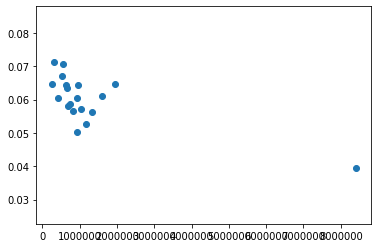

In [67]:
plt.scatter(edited_pops, price_per_km)

In [78]:
kms = list(cab_records['KM Travelled'])

In [80]:
kms.sort()

In [87]:
short_distance_offset = kms[int(len(kms)/4)] # distances under this values will be evaluated as short distances

In [84]:
long_distance_offset = kms[int(3*len(kms)/4)] # distances above this values will be evaluated as long distances

In [85]:
long_distance_offset

32.96

In [88]:
short_distance_cost = cab_records.loc[cab_records['KM Travelled'] <= short_distance_offset, 'Cost of Trip'].sum()

In [89]:
short_distance_income = cab_records.loc[cab_records['KM Travelled'] <= short_distance_offset, 'Price Charged'].sum()

In [90]:
long_distance_cost = cab_records.loc[cab_records['KM Travelled'] >= long_distance_offset, 'Cost of Trip'].sum()

In [91]:
long_distance_income = cab_records.loc[cab_records['KM Travelled'] >= long_distance_offset, 'Price Charged'].sum()

In [92]:
short_profit_rate = (short_distance_income - short_distance_cost)/short_distance_cost

In [93]:
long_profit_rate = (long_distance_income - long_distance_cost)/long_distance_cost

In [94]:
short_profit_rate

0.4809848484118332

In [95]:
long_profit_rate

0.47927762890933717

In [96]:
transactions = pd.read_csv('Transaction_ID.csv')

In [100]:
payment_mode_joined = pd.merge(cab_records, transactions, how="inner", on="Transaction ID")

In [101]:
payment_mode_joined

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card
...,...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card


In [109]:
payment_mode_joined[payment_mode_joined['KM Travelled'] <= short_distance_offset].count()['Transaction ID']

90525

In [111]:
payment_mode_joined[(payment_mode_joined['KM Travelled'] <= short_distance_offset) & (payment_mode_joined['Payment_Mode'] == 'Card')].count()['Transaction ID']

54173

In [112]:
payment_mode_joined[payment_mode_joined['KM Travelled'] >= long_distance_offset].count()['Transaction ID']

90169

In [113]:
payment_mode_joined[(payment_mode_joined['KM Travelled'] >= long_distance_offset) & (payment_mode_joined['Payment_Mode'] == 'Card')].count()['Transaction ID']

54127

In [119]:
pink_cost = cab_records.loc[cab_records['Company'] == 'Pink Cab', 'Cost of Trip'].sum()

In [122]:
yellow_cost = cab_records.loc[cab_records['Company'] == 'Yellow Cab', 'Cost of Trip'].sum()

In [116]:
yellow_income = cab_records.loc[cab_records['Company'] == 'Yellow Cab', 'Price Charged'].sum()

In [117]:
pink_income = cab_records.loc[cab_records['Company'] == 'Pink Cab', 'Price Charged'].sum()

In [120]:
pink_profit_rate = (pink_income - pink_cost)/pink_cost

In [123]:
yellow_profit_rate = (yellow_income - yellow_cost)/yellow_cost

In [124]:
pink_profit_rate

0.25247836732610157

In [125]:
yellow_profit_rate

0.5379259793300798

In [ ]:
#I recommend Yellow Cab according to general profit rate

In [126]:
joined_users = pd.merge(cab_records, transactions, how="inner", on="Transaction ID")

In [129]:
joined_users.drop_duplicates(subset='Customer ID')

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card
...,...,...,...,...,...,...,...,...,...
359114,10439790,43107,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,38520,Card
359123,10439799,43103,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,12490,Cash
359155,10439838,43104,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,41414,Card
359157,10439840,43106,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,41677,Cash


In [130]:
joined_users.groupby(["City", 'Company']).count()["Customer ID"]

City            Company   
ATLANTA GA      Pink Cab       1762
                Yellow Cab     5795
AUSTIN TX       Pink Cab       1868
                Yellow Cab     3028
BOSTON MA       Pink Cab       5186
                Yellow Cab    24506
CHICAGO IL      Pink Cab       9361
                Yellow Cab    47264
DALLAS TX       Pink Cab       1380
                Yellow Cab     5637
DENVER CO       Pink Cab       1394
                Yellow Cab     2431
LOS ANGELES CA  Pink Cab      19865
                Yellow Cab    28168
MIAMI FL        Pink Cab       2002
                Yellow Cab     4452
NASHVILLE TN    Pink Cab       1841
                Yellow Cab     1169
NEW YORK NY     Pink Cab      13967
                Yellow Cab    85918
ORANGE COUNTY   Pink Cab       1513
                Yellow Cab     2469
PHOENIX AZ      Pink Cab        864
                Yellow Cab     1200
PITTSBURGH PA   Pink Cab        682
                Yellow Cab      631
SACRAMENTO CA   Pink Cab       1334
 

In [ ]:
#Yellow Cab has the dominance on the number of customers based on cities